In [1]:
# Let's use MAF to pull up the observations from a single point in the sky

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import healpy as hp
import rubin_sim.maf as maf
import rubin_sim.utils as utils


In [3]:
from rubin_sim.data import get_baseline

baseline_file = get_baseline()

run_name = os.path.split(baseline_file)[-1].replace('.db', '')
print(run_name)

baseline_v3.0_10yrs


In [4]:
# Specify ra / dec of the point we want to work with on the sky - in degrees. 
# (these can be lists, if you want to work on multiple, limited points on the sky)
test_ra = 0.0
test_dec = -20.0
test_slicer = maf.UserPointsSlicer(test_ra, test_dec)


In [5]:
# All the potential columns documented at https://rubin-sim.lsst.io/rs_scheduler/output_schema.html
cols = ['observationStartMJD', 'fieldRA', 'fieldDec', 'rotTelPos',
        'fivesigmadepth', 'rotSkyPos', 'filter', 'night', 'note']
metric = maf.PassMetric(cols=cols)


In [6]:
sql=''
bundle = maf.MetricBundle(metric, test_slicer, sql, run_name=run_name)


In [7]:
g = maf.MetricBundleGroup({'test_metric': bundle}, baseline_file,
                          out_dir='test', results_db=None)
# And calculate the metric
g.run_all()

In [8]:
bundle.metric_values[0][0:2]

rec.array([(2859, 63077.24779799, 358.66965277, 351.92614502, 105.5438157 , 23.53705506, -21.40199934, 'i', 'blob, iz, a'),
           (1468, 61686.07639785, 358.79558706,  32.53227215, 148.61547835, 23.04979756, -21.39965042, 'z', 'blob, iz, b')],
          dtype=[('night', '<i8'), ('observationStartMJD', '<f8'), ('fieldRA', '<f8'), ('rotTelPos', '<f8'), ('rotSkyPos', '<f8'), ('fiveSigmaDepth', '<f8'), ('fieldDec', '<f8'), ('filter', 'O'), ('note', 'O')])

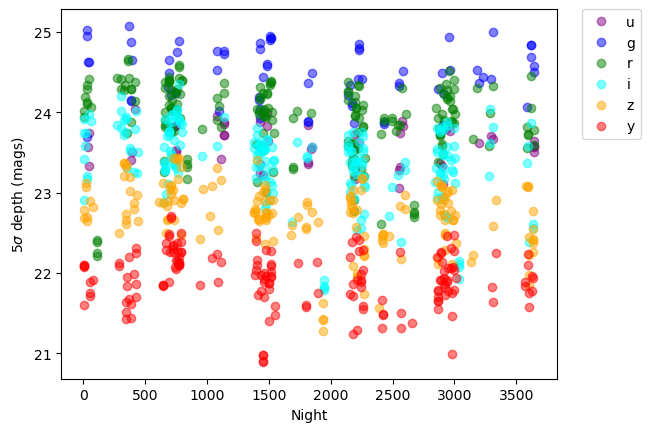

In [15]:
# filter to color dict
f2c = {'u': 'purple', 'g': 'blue', 'r': 'green',
           'i': 'cyan', 'z': 'orange', 'y': 'red'}

mv = bundle.metric_values[0]

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
for fn in f2c:
    in_filt = np.where(mv['filter'] == fn)[0]
    ax1.plot(mv['night'][in_filt],
             mv['fiveSigmaDepth'][in_filt], 'o',
             color=f2c[fn], label=fn, alpha=0.5)
ax1.set_xlabel('Night')
ax1.set_ylabel(r'5$\sigma$ depth (mags)')
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)


In [10]:
# All the different survey objects that took observations overlapping this point.
print(np.unique(mv['note']))

['blob, gr, a' 'blob, gr, b' 'blob, iz, a' 'blob, iz, b' 'blob, ri, a'
 'blob, ri, b' 'blob, ug, a' 'blob, ug, b' 'blob, ur, a' 'blob, ur, b'
 'blob, yy, a' 'blob, yy, b' 'blob, zy, a' 'blob, zy, b'
 'blob_long, gr, a' 'blob_long, gr, b' 'blob_long, iz, a'
 'blob_long, iz, b' 'blob_long, ri, a' 'blob_long, ri, b'
 'blob_twi, iz, a' 'blob_twi, iz, b' 'blob_twi, ri, a' 'blob_twi, ri, b'
 'blob_twi, yy, a' 'blob_twi, yy, b' 'blob_twi, zy, a' 'blob_twi, zy, b'
 'greedy' 'long' 'twilight_neo']


In [16]:
# can be handy to inspect the data here, get a feel for what info you can get access to.